In [1]:
# calculation packages
import numpy as np 
import pandas as pd 

# textual analysis packages 
from sklearn.feature_extraction.text import TfidfVectorizer

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn import datasets, decomposition
from sklearn.cluster import KMeans

# visualization
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/emma/Desktop/oldschool/ml_perspectives/project/data/thisone.csv')
data = data.drop('Unnamed: 0', axis=1)

In [3]:
stop_words = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 
              'not', 'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 'will', 'with']

lyrics = data['lyrics']
vectorizer = TfidfVectorizer(strip_accents = 'ascii', stop_words = stop_words, ngram_range= (1, 1))

# fitting
X = vectorizer.fit_transform(lyrics)

# checking shape
print(X.shape)

# checking matrix type

(4584, 3907)


**Truncated SVD**

In [4]:
# using the min number from x.shape
svd = decomposition.TruncatedSVD(n_components=3907)
svd.fit(X)

# getting explained variance
explained_variance_ratio = svd.explained_variance_ratio_

# calculating the cumlative sum in order to find the best num of features/dims that explains the most 
# variance while reducing dimensionality
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

Text(0.5, 1.0, 'Cumulative Explained Variance')

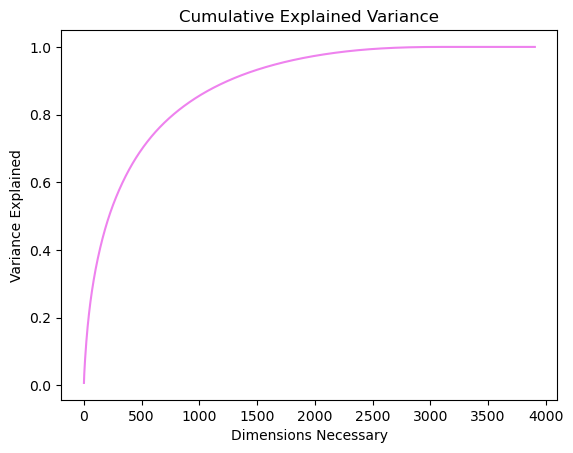

In [5]:
# plotting results
plt.plot(cumulative_explained_variance, color='violet')
plt.ylabel('Variance Explained')
plt.xlabel('Dimensions Necessary')
plt.title('Cumulative Explained Variance')

In [6]:
# getting a more exact number
np.argmax(cumulative_explained_variance >= 0.90) + 1

1250

In [6]:
svd = decomposition.TruncatedSVD(n_components=1250)
X_svd= svd.fit_transform(X)

**K-Means Clustering**
- Now that I have reduced dimensions, I can apply K-means clustering.
- First, I will try to find the ideal 'K' number of clusters.

In [24]:
possible_k = range(10, 21)

def finding_best_k(X, possible_k):

    wss_vals = []
    for k in possible_k:

        kmeans = KMeans(n_clusters=k, random_state=13, n_init=10).fit(X) # finding the Kmeans for each number of clusters 
        wss = round(kmeans.inertia_, 3)
        print('k:', k)
        print('wss:', wss)
        wss_vals.append(wss)

    plt.plot(possible_k, wss_vals, marker='o', color='violet') # plotting the k with the wss value so I can viualize the elbow point
    plt.ylabel('WCSS')
    plt.xlabel('K Clusters')
    plt.title(f'Finding Elbow Point')
    plt.show()

k: 10
wss: 3843.9
k: 11
wss: 3838.066
k: 12
wss: 3816.138
k: 13
wss: 3806.895
k: 14
wss: 3792.873
k: 15
wss: 3788.519
k: 16
wss: 3776.508
k: 17
wss: 3756.831
k: 18
wss: 3752.327
k: 19
wss: 3737.211
k: 20
wss: 3731.197


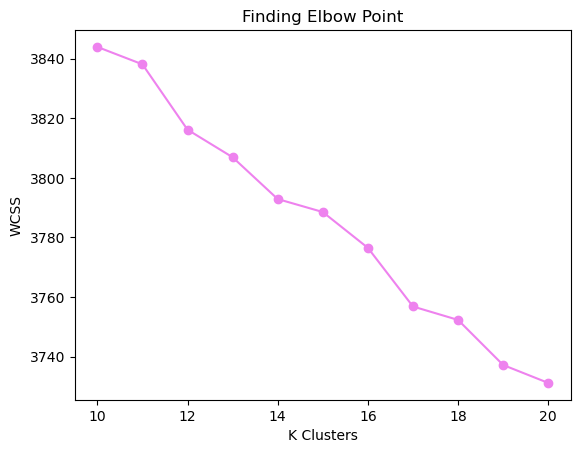

In [25]:
finding_best_k(X_svd, possible_k)

There isn't an obvious 'elbow point' here, I will look a little further. I need to be careful because I don't want to give it space to over fit the data

In [26]:
possible_k = range(21, 25)

k: 21
wss: 3727.778
k: 22
wss: 3707.924
k: 23
wss: 3712.245
k: 24
wss: 3704.76


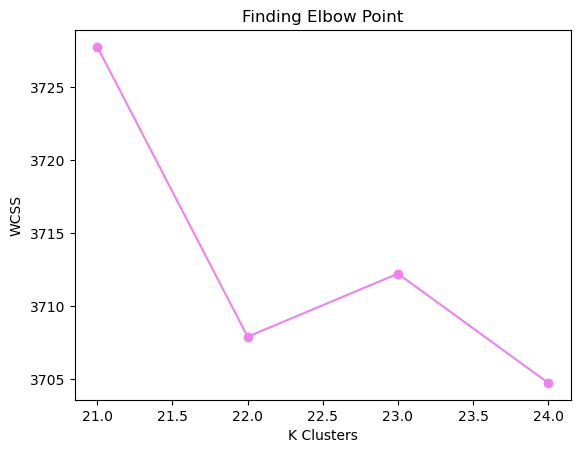

In [27]:
finding_best_k(X_svd, possible_k)

k: 15
wss: 3788.519
k: 16
wss: 3776.508
k: 17
wss: 3756.831
k: 18
wss: 3752.327
k: 19
wss: 3737.211
k: 20
wss: 3731.197
k: 21
wss: 3727.778
k: 22
wss: 3707.924
k: 23
wss: 3712.245
k: 24
wss: 3704.76


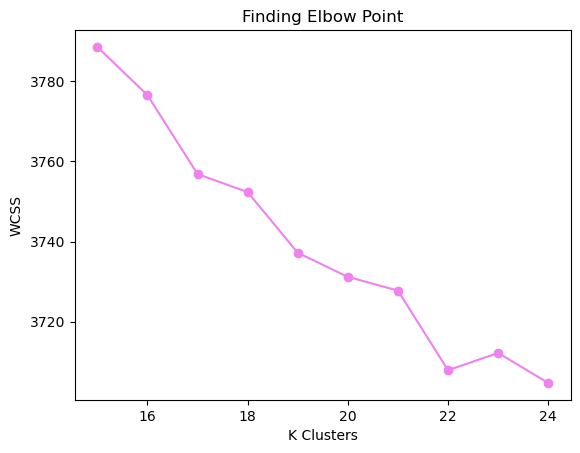

In [28]:
possible_k = range(15, 25)
finding_best_k(X_svd, possible_k)

- There doesn't seem to be an ideal number of clusters, and it appears as though my data is suffering from the curse of high dimensionality. I will be using 22, because it seems like the best possible option without allowing the data to overfit.

In [29]:
kmeans = KMeans(n_clusters=22, random_state=13, n_init=10).fit(X_svd)
y_pred = kmeans.labels_

In [30]:
clusters = kmeans.labels_
clusters

array([ 3, 12, 12, ..., 16, 12, 15], dtype=int32)

Since I still have over 1000 dims, I will obviously not be able to 'view' the clusters. However, I can get around this by seeing which cluster each data point was assigned to by adding the label column to my dataframe

In [31]:
data['clusters'] = clusters

In [33]:
data = data.drop('Unnamed: 0', axis = 1)

In [34]:
# checking that it worked
data.head(10)

,album_name,lyrics,clusters
0,taylor swift,He said the way my blue eyes shined Put those ...,3
1,taylor swift,"I said, ""That's a lie"" Just a boy in a Chevy t...",12
2,taylor swift,That had a tendency of gettin' stuck On back r...,12
3,taylor swift,And I was right there beside him all summer lo...,19
4,taylor swift,But when you think Tim McGraw I hope you think...,1
5,taylor swift,The one we danced to all night long The moon l...,2
6,taylor swift,When you think happiness I hope you think that...,12
7,taylor swift,Think of my head on your chest And my old fade...,1
8,taylor swift,When you think Tim McGraw I hope you think of me,8
9,taylor swift,September saw a month of tears And thankin' Go...,12


In [45]:
# setting to none, because I need to be able to see if there is a pattern
pd.set_option('display.max_colwidth', None)

In [46]:
# did this for each of the clusters, looking for any sort of pattern
cluster1 = data[data['clusters'] == 1]
cluster1.head(10)

,album_name,lyrics,clusters
4,taylor swift,But when you think Tim McGraw I hope you think my favorite song,1
7,taylor swift,Think of my head on your chest And my old faded blue jeans,1
13,taylor swift,When you think Tim McGraw I hope you think my favorite song,1
16,taylor swift,"""When you think Tim McGraw I hope you think my favorite song",1
27,taylor swift,I'm just sitting here planning my revenge There's nothing stopping me,1
51,taylor swift,'Cause he's the reason for the teardrops on my guitar The only one who's got enough of me to break my heart,1
59,taylor swift,"Oh, I'm just a girl, trying to find a place in this world Got the radio on, my old blue jeans",1
60,taylor swift,"And I'm wearing my heart on my sleeve Feeling lucky today, got the sunshine",1
62,taylor swift,"But that's OK I'm alone, on my own, and that's all I know",1
97,taylor swift,The highlight of my day I'm taking pictures in my mind,1


- I found patterns in cluster 0 and cluster 9, but it appeared to be unrealated to specific albums.

Text(0, 0.5, 'Value Counts')

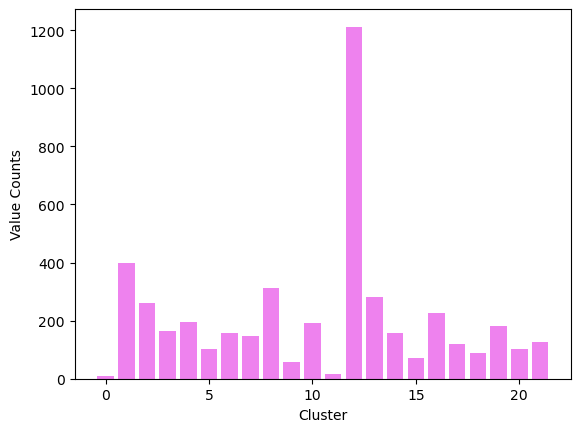

In [48]:
# seeing the dist of clusters
cc = data['clusters'].value_counts()

plt.bar(cc.index, cc.values, color='violet')
plt.xlabel('Cluster')
plt.ylabel('Value Counts')

In [61]:
# I was interested in 12 because of how large it was, but there is no pattern I can pick out. Seems almost like a 'left over' cluster
cluster0 = data[data['clusters'] == 12]
cluster0.head(800)

,album_name,lyrics,clusters
1,taylor swift,"I said, ""That's a lie"" Just a boy in a Chevy truck",12
2,taylor swift,That had a tendency of gettin' stuck On back roads at night,12
6,taylor swift,When you think happiness I hope you think that little black dress,12
9,taylor swift,September saw a month of tears And thankin' God that you weren't here,12
11,taylor swift,Is a letter that you never read From three summers back,12
12,taylor swift,"It's hard not to find it all a little bittersweet And lookin' back on all of that, it's nice to believe",12
19,taylor swift,"I said, ""That's a lie""",12
22,taylor swift,By the way... I hate that stupid old pickup truck,12
24,taylor swift,Who's really bad at lying So watch me strike a match,12
31,taylor swift,You'd better keep it to yourself 'Cause coming back around here,12


In [59]:
centroids = kmeans.cluster_centers_